<h1> UBER SUPPLY DEMAND GAP </h1>

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv(r"f:\\Uber Request Data.csv")   # READ DATA
df.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


In [3]:
df.info()   # Information About The Data Set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


In [4]:
df.count() # Information about dataset without null values 

Request id           6745
Pickup point         6745
Driver id            4095
Status               6745
Request timestamp    6745
Drop timestamp       2831
dtype: int64

**EDA'S**

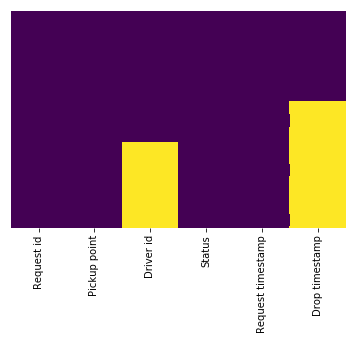

In [5]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
sum(df.duplicated(subset = "Request id",keep='first')) == 0 # if any Rows duplicate values is 0 or not 

True

In [7]:
print (df['Pickup point'].isnull().values.any())
print (df['Pickup point'].isnull().values.sum())

False
0


In [8]:
print (df['Request id'].isnull().values.any()) 
print (df['Request id'].isnull().values.sum())

False
0


In [9]:
print (df['Status'].isnull().values.any())
print (df['Status'].isnull().values.sum())

False
0


In [10]:
print (df['Request timestamp'].isnull().values.any())
print (df['Request timestamp'].isnull().values.sum())

False
0


In [11]:
df_missing=df.isna()    # To check missing values (nan value) in the dataset
df_missing

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


In [12]:
#df.fillna(method="ffill",limit=2)
#new_df=df.fillna(0.0)
#new_df

df["Driver id"].fillna( method ='ffill', inplace = True)
df["Drop timestamp"].fillna( method ='ffill', inplace = True) 
df


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


In [13]:
new_df_missing=df.isna()  # To check Any missing Value In dataset we checked again 
new_df_missing

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


In [14]:
new_df_missing.sum()

Request id           0
Pickup point         0
Driver id            0
Status               0
Request timestamp    0
Drop timestamp       0
dtype: int64

In [15]:
car_average=new_df_missing.sum()/len(df)
car_average 


Request id           0.0
Pickup point         0.0
Driver id            0.0
Status               0.0
Request timestamp    0.0
Drop timestamp       0.0
dtype: float64

<h2>No Missing Values Using HeatMap

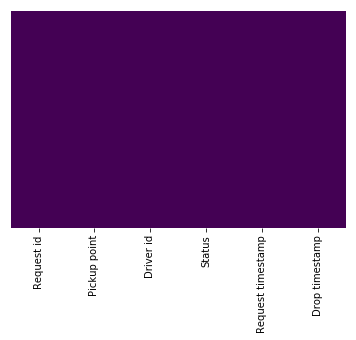

In [16]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**Convert 'Request timestamp' column to datetime oject**

In [17]:
df["Request timestamp"] = df["Request timestamp"].astype(str)
df['Request timestamp'] = df['Request timestamp'].str.replace("/", "-")
df['Request timestamp'] = pd.to_datetime(df["Request timestamp"], dayfirst=True)

In [18]:
# convert 'Drop timestamp' column to datetime oject
df["Drop timestamp"] = df["Drop timestamp"].astype(str)
df['Drop timestamp'] = df['Drop timestamp'].str.replace("/", "-")
df['Drop timestamp'] = pd.to_datetime(df["Drop timestamp"], dayfirst=True) # the Data Type of Date column was object but after using to_datetime(), it got converted into a date time object.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            6745 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       6745 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.2+ KB


In [20]:
#extract the day from the request time
df['Request Date'] = df["Request timestamp"].dt.date
df['Request Time'] = df["Request timestamp"].dt.time
df['Drop Date'] = df["Drop timestamp"].dt.date
df['Drop Time'] = df["Drop timestamp"].dt.time
df['Request Weekday'] = df['Request timestamp'].apply(lambda x: dt.datetime.strftime(x, '%A'))
df['Request Hour'] = df['Request timestamp'].apply(lambda x: x.hour)

In [21]:
df.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Date,Request Time,Drop Date,Drop Time,Request Weekday,Request Hour
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,2016-07-11,13:00:00,Monday,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,2016-07-11,18:47:00,Monday,17
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,2016-07-12,09:58:00,Tuesday,9
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,2016-07-12,22:03:00,Tuesday,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,2016-07-13,09:25:47,Wednesday,8
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,2016-07-13,21:57:28,2016-07-13,22:28:59,Wednesday,21
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,2016-07-14,06:15:32,2016-07-14,07:13:15,Thursday,6
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,2016-07-15,05:11:52,2016-07-15,06:07:52,Friday,5
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,2016-07-15,17:57:27,2016-07-15,18:50:51,Friday,17
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,2016-07-11,06:46:00,2016-07-11,07:25:00,Monday,6


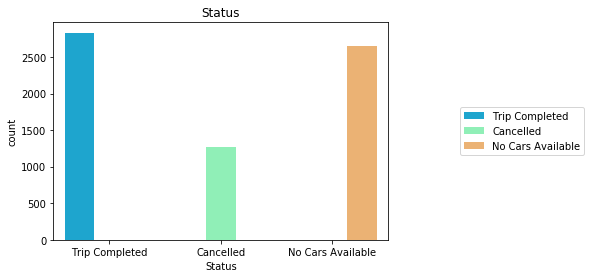

In [73]:
plt.title('Status')  #We can clearly see from this plot that Uber is losing quite a lot of business due to shortage of available Cabs. The question that surfaces now is at what times during the day is the supply and demand gap most severe and if that is different for different days in the week.
plt.legend(bbox_to_anchor=(1.60, 0.5), loc='right')



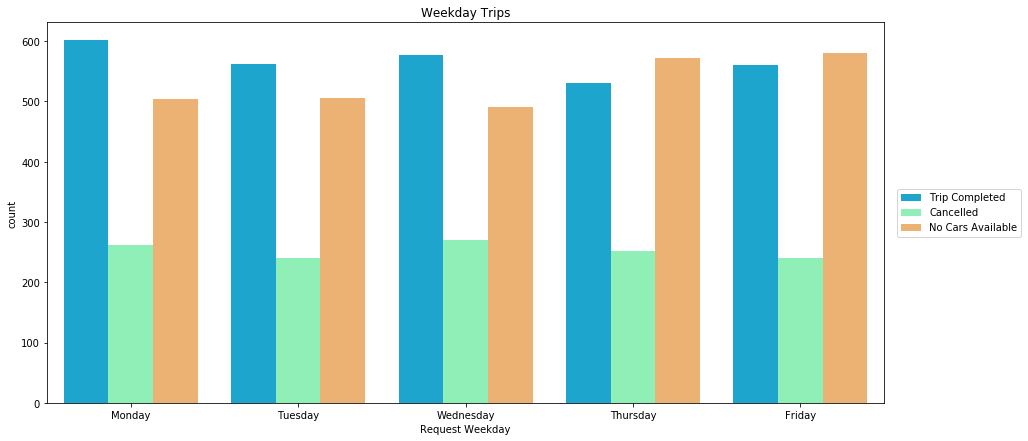

In [106]:
# Status for each day
fig, ax = plt.subplots(figsize=(15,7))
plt.title("Weekday Trips")
ax = sns.countplot(x='Request Weekday',hue='Status',data=df,palette='rainbow')
plt.legend(bbox_to_anchor=(1.17, 0.5), loc='right')



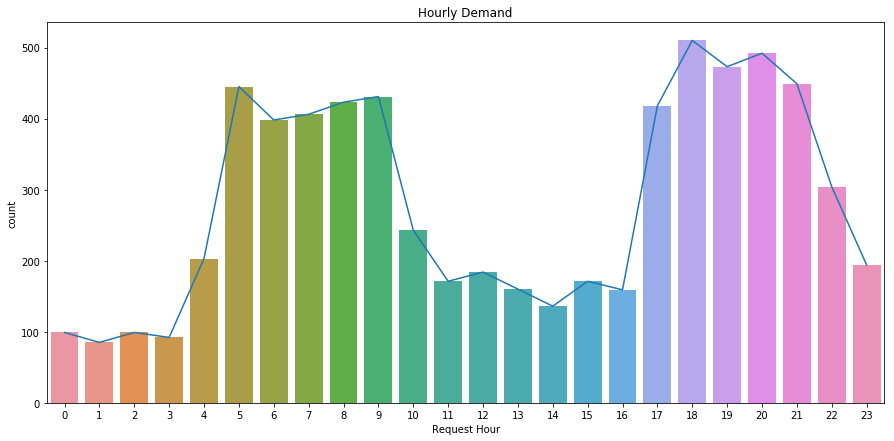

In [104]:
# plot data to show hourly distribution of request/demand
fig, ax = plt.subplots(figsize=(15,7))
plt.title('Hourly Demand')
df.groupby(df['Request Hour']).count()['Request id'].plot(ax=ax)
sns.countplot(df['Request Hour'])

<h1> Binning Into Time Categories </h1>

In [24]:
# creating a time slot for various time period of day
def time_period(x):
    'divide the time of the day into four categories'
    if x < 5:
        return "Pre_Morning"
    elif 5 <= x < 10:
        return "Morning_Rush"
    elif 10 <= x < 17:
        return "Day_Time"
    elif 17 <= x < 22:
        return "Evening_Rush"
    else:
        return "Late_Night"

df['time_slot'] = df['Request Hour'].apply(lambda x: time_period(x))


Pre_Morning = print (df.time_slot[df.time_slot == "Pre_Morning"].value_counts())
Morning_Rush = print (df.time_slot[df.time_slot == "Morning_Rush"].value_counts())
Day_Time = print (df.time_slot[df.time_slot == "Day_Time"].value_counts())
Evening_Rush = print (df.time_slot[df.time_slot == "Evening_Rush"].value_counts())
Late_Night = print (df.time_slot[df.time_slot == "Late_Night"].value_counts())

Pre_Morning    578
Name: time_slot, dtype: int64
Morning_Rush    2103
Name: time_slot, dtype: int64
Day_Time    1224
Name: time_slot, dtype: int64
Evening_Rush    2342
Name: time_slot, dtype: int64
Late_Night    498
Name: time_slot, dtype: int64


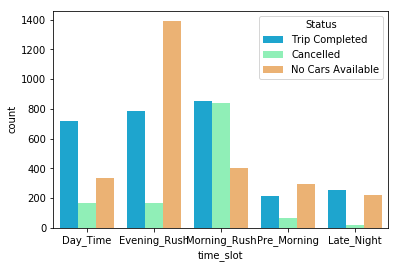

In [25]:
sns.countplot(x = "time_slot", hue = "Status", data = df,palette='rainbow')

<h1>Let's look at the supply and demand in Morning rush hour</h1>

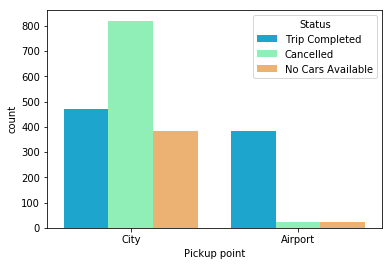

In [74]:
# as you can see in the above plot the higest number of cancellations are in the "Morning Rush" time slot
df_morning_rush = df[df.time_slot == "Morning_Rush"]
sns.countplot(x = "Pickup point", hue = "Status", data = df_morning_rush,palette='rainbow')

In [27]:
#DEMAND

df_city_morning_rush  = df_morning_rush.loc[(df_morning_rush["Pickup point"] == "City")]
cd=len(df_city_morning_rush.index)
print("City Morning Cab Requirement    ",len(df_city_morning_rush.index))

df_airport_morning_rush  = df_morning_rush.loc[(df_morning_rush["Pickup point"] == "Airport")]
ad=len(df_airport_morning_rush.index)
print("Airport Morning Cab Requirement ",len(df_airport_morning_rush.index))


City Morning Cab Requirement     1677
Airport Morning Cab Requirement  426


In [28]:
#SUPPLY

df_city_completed_morning_rush = df_morning_rush.loc[(df_morning_rush["Pickup point"] == "City") & (df_morning_rush["Status"] == "Trip Completed")]
cs=len(df_city_completed_morning_rush.index)
print("City Morning Trip Completed",len(df_city_completed_morning_rush.index)) 

df_airport_completed_morning_rush = df_morning_rush.loc[(df_morning_rush["Pickup point"] == "Airport") & (df_morning_rush["Status"] == "Trip Completed")]
aas=len(df_airport_completed_morning_rush.index)
print("Airport Morning Trip Completed",len(df_airport_completed_morning_rush.index))


City Morning Trip Completed 472
Airport Morning Trip Completed 382


In [29]:
#GAP
Gap_city=cd-cs
Gap_airport=ad-aas
print("City Morning Rush Gap ",Gap_city)
print("Airport Morning Rush Gap ",Gap_airport)

City Morning Rush Gap  1205
Airport Morning Rush Gap  44


In [30]:
#cancellation of cab as per the pickup location Airport or City @ Morning Rush 5 am to  10am :
df_airport_cancelled  = df_morning_rush.loc[(df_morning_rush["Pickup point"] == "Airport") & (df_morning_rush["Status"] == "Cancelled")]
df_city_cancelled = df_morning_rush.loc[(df_morning_rush["Pickup point"] == "City") & (df_morning_rush["Status"] == "Cancelled")]

print("Airport Trip Cancelled during Morning Rush",len(df_airport_cancelled.index))
print("City    Trip Cancelled during Morning Rush ",len(df_city_cancelled.index))



Airport Trip Cancelled during Morning Rush 23
City    Trip Cancelled during Morning Rush  820


In [31]:
# severity of problem by location in Morning Rush (Unavailability of Cars)
df_airport_unavailable_morning_rush  = df_morning_rush.loc[(df_morning_rush["Pickup point"] == "Airport") & (df_morning_rush["Status"] == "No Cars Available")]
print("Cab Unavailability during Morning Rush at Airport is ",len(df_airport_unavailable_morning_rush.index))

df_city_unavailable_morning_rush  = df_morning_rush.loc[(df_morning_rush["Pickup point"] == "City") & (df_morning_rush["Status"] == "No Cars Available")]
print("Cab Unavailability during Morning Rush at City is ",len(df_city_unavailable_morning_rush.index))


Cab Unavailability during Morning Rush at Airport is  21
Cab Unavailability during Morning Rush at City is  385


<h2>Let's look at the supply and demand in evening rush hour </h2>

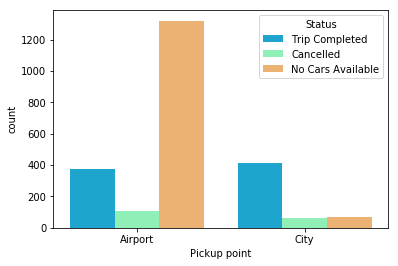

In [75]:
# let's look at the supply and demand in evening rush hour
df_evening_rush = df[df.time_slot == "Evening_Rush"]
sns.countplot(x = "Pickup point", hue = "Status", data = df_evening_rush,palette='rainbow')

In [33]:
# Demand
df_city_evening_rush  = df_evening_rush.loc[(df_evening_rush["Pickup point"] == "City")]
cd1=len(df_city_evening_rush.index)
print("City Evening Cab Requirement",len(df_city_evening_rush.index))

df_airport_evening_rush  = df_evening_rush.loc[(df_evening_rush["Pickup point"] == "Airport")]
ad1=len(df_airport_evening_rush.index)
print("Airport Evening Cab Requirement",len(df_airport_evening_rush.index))


City Evening Cab Requirement 542
Airport Evening Cab Requirement 1800


In [34]:
#Supply
df_city_completed_evening_rush = df_evening_rush.loc[(df_evening_rush["Pickup point"] == "City") & (df_evening_rush["Status"] == "Trip Completed")]
cs1=len(df_city_completed_evening_rush.index)
print("City Evening Trip Completed ",len(df_city_completed_evening_rush.index))

df_airport_completed_evening_rush = df_evening_rush.loc[(df_evening_rush["Pickup point"] == "Airport") & (df_evening_rush["Status"] == "Trip Completed")]
as1=len(df_airport_completed_evening_rush.index)
print("Airport Evening Trip Completed",len(df_airport_completed_evening_rush.index))

City Evening Trip Completed  411
Airport Evening Trip Completed 373


In [35]:
#GAP Between Supply & Demand
GAP1_city=cd1-cs1
GAP2_airport=ad1-as1
print("City Evening Rush Gap",GAP1_city)
print("Airport Evening Rush Gap",GAP2_airport)


City Evening Rush Gap 131
Airport Evening Rush Gap 1427


In [36]:
# cancellation of cab 
df_airport_cancelled_evening_rush  = df_evening_rush.loc[(df_evening_rush["Pickup point"] == "Airport") & (df_evening_rush["Status"] == "Cancelled")]
len(df_airport_cancelled_evening_rush.index)
print("Airport Trip Cancelled during Evening Rush",len(df_airport_cancelled_evening_rush.index))

df_city_cancelled_evening_rush = df_evening_rush.loc[(df_evening_rush["Pickup point"] == "City") & (df_evening_rush["Status"] == "Cancelled")]
len(df_city_cancelled_evening_rush.index)
print("City Trip Cancelled during Evening Rush",len(df_city_cancelled_evening_rush.index))



Airport Trip Cancelled during Evening Rush 106
City Trip Cancelled during Evening Rush 60


In [37]:
# Unavailability of Cab
df_airport_unavailable_evening_rush  = df_evening_rush.loc[(df_evening_rush["Pickup point"] == "Airport") & (df_evening_rush["Status"] == "No Cars Available")]
print("Cab Unavailability during Evening Rush at Airport is ",len(df_airport_unavailable_evening_rush.index))

df_city_unavailable_evening_rush  = df_evening_rush.loc[(df_evening_rush["Pickup point"] == "City") & (df_evening_rush["Status"] == "No Cars Available")]
print("Cab Unavailability during Evening Rush at City is ",len(df_city_unavailable_evening_rush.index))



Cab Unavailability during Evening Rush at Airport is  1321
Cab Unavailability during Evening Rush at City is  71


<h1> Hourly Supply Demand Curve For City to Airport </h1>

C:\Users\Sandeep_shweta\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


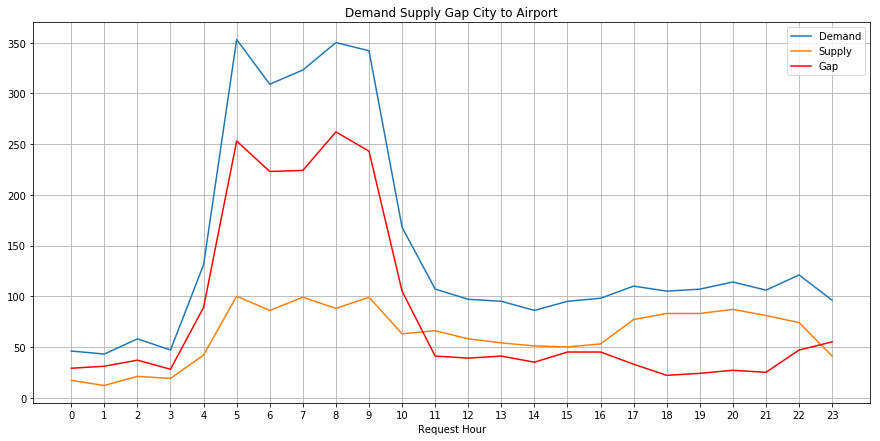

In [100]:
#plot data to show demand supply gap City to Airport
fig, ax = plt.subplots(figsize=(15,7))
plt.xticks([i for i in range(0,24)])
city.groupby(city['Request Hour']).count()['Request id'].plot(ax=ax, label='Demand')
city[city['Status']=="Trip Completed"].groupby(city[city['Status']=="Trip Completed"]['Request Hour']).count()['Request id'].plot(ax=ax, label='Supply')
(city.groupby(city['Request Hour']).count()['Request id'] - city[city['Status']=="Trip Completed"].groupby(city[city['Status']=="Trip Completed"]['Request Hour']).count()['Request id']).plot(ax=ax, label='Gap', c='red')
plt.grid("on")
plt.title("Demand Supply Gap City to Airport")
plt.legend()

<h1> Hourly Supply Demand Curve For Airport to City</h1>

C:\Users\Sandeep_shweta\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


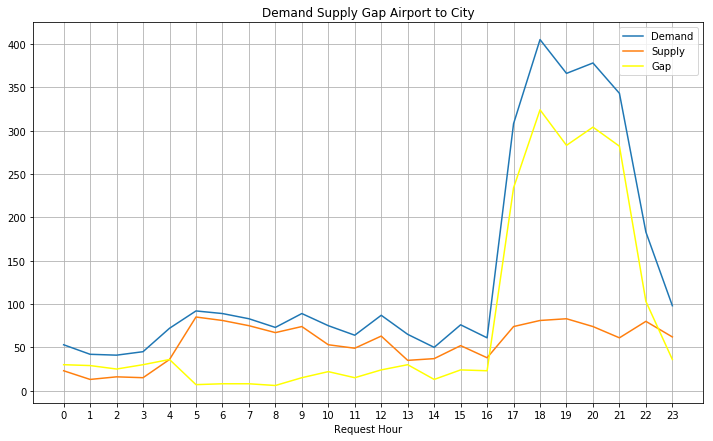

In [99]:
airport = df[df['Pickup point']=="Airport"]
fig, ax = plt.subplots(figsize=(12,7))
plt.title('Hourly Demand & Supply Curve')


plt.xticks([i for i in range(0,24)])
airport.groupby(airport['Request Hour']).count()['Request id'].plot(ax=ax, label='Demand')
airport[airport['Status']=="Trip Completed"].groupby(airport[airport['Status']=="Trip Completed"]['Request Hour']).count()['Request id'].plot(ax=ax, label='Supply')


(airport.groupby(airport['Request Hour']).count()['Request id'] - airport[airport['Status']=="Trip Completed"].groupby(airport[airport['Status']=="Trip Completed"]['Request Hour']).count()['Request id']).plot(ax=ax, label='Gap', c='Yellow')
plt.grid("on")
plt.title("Demand Supply Gap Airport to City")
plt.legend()


In [101]:
# Let's create pie charts instead of a count plots
def pie_chart(dataframe):
    """
    creates a pie chart
    input: dataframe with a 'category' as index and a numerical column
    output: pie chart
    """
    labels = dataframe.index.values
    sizes = dataframe['Status'].values
        
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

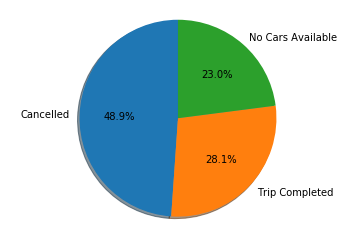

In [102]:
# percentage breakup of status on the basis of pickup location
# Status of trips @ Morning Rush where pickup point is City
df_city = df.loc[(df["Pickup point"] == "City") & (df.time_slot == "Morning_Rush")]
df_city_count = pd.DataFrame(df_city.Status.value_counts())
pie_chart(df_city_count)

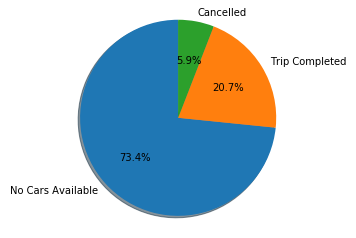

In [103]:
# Status of trips @ Evening Rush where pickup point is Airport
df_airport = df.loc[(df["Pickup point"] == "Airport") & (df.time_slot == "Evening_Rush")] 
df_airport_count = pd.DataFrame(df_airport.Status.value_counts())
pie_chart(df_airport_count)